# Data visualization

### Load data

In [153]:
import numpy as np
import pandas as pd

unblinded_file = '../data/unblinded_data.csv'
df = pd.read_csv(unblinded_file)

df.head() # Look at first five rows

,Vessels percentage area,Total Number of Junctions,Total Vessels Length,Total Number of End Points,Litter,AnimalID,Genotype
0,65.03,119,14.21,16,35,35-3,+/+
1,61.50,183,16.88,17,35,35-3,+/+
2,55.25,157,15.50,29,35,35-3,+/+
3,55.22,138,14.47,37,35,35-5,DEE/DEE
4,51.73,134,13.18,32,35,35-5,DEE/DEE


### Average over Litter and Genotype
Now that we have unblinded our data by assigning genotypes to the various animals, let's pivot by `Genotype` and `Litter` using `set_index()`.

We can also use `sort_index()` to make sure the genotype ordering is consistent for all litters.

Once grouped, we can calculate mean values.

In [154]:
data_mean = (df
             .set_index(['Litter', 'Genotype']) # pivot
             .sort_index(level = ['Litter', 'Genotype'])
             .mean(level = ['Litter', 'Genotype'])
            )

pd.options.display.float_format = '{:,.2f}'.format
data_mean.head()

Vessels percentage area  Total Number of Junctions  \
Litter Genotype                                                       
35     +/+                         60.59                     153.00   
       DEE/DEE                     53.62                     132.33   
36     +/+                         64.30                     171.67   
       DEE/DEE                     62.15                     136.83   
37     +/+                         58.68                     110.00   

                 Total Vessels Length  Total Number of End Points  
Litter Genotype                                                    
35     +/+                      15.53                       20.67  
       DEE/DEE                  13.57                       38.67  
36     +/+                      16.09                       26.33  
       DEE/DEE                  14.42                       31.17  
37     +/+                      13.10                       25.33

### Split data by genotype and then parameters

`data_mean` is a `MultiIndex` object instead of your usual `DataFrame`

In [209]:
#data_mean.index

We will use `panda`'s cross-section function, `DataFrame.xs`, to separate our data by genotype.

| Wild type | Mutant  |
|-----------|---------|
| +/+       | DEE/DEE |

In [156]:
wild =   data_mean.xs('+/+',     level = 'Genotype')
mutant = data_mean.xs('DEE/DEE', level = 'Genotype')

In [157]:
## Get parameter data arrays
wildVPA =           wild['Vessels percentage area'].values
wildNJunctions =    wild['Total Number of Junctions'].values
wildVesselsLength = wild['Total Vessels Length'].values
wildNEndPoints =    wild['Total Number of End Points'].values

mutantVPA =           mutant['Vessels percentage area'].values
mutantNJunctions =    mutant['Total Number of Junctions'].values
mutantVesselsLength = mutant['Total Vessels Length'].values
mutantNEndPoints =    mutant['Total Number of End Points'].values

## Plotting

In [158]:
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

def pair_dot_plot(befores, afters, ylabel,
                  xticklabels=['+/+', 'mutant DEE/DEE'],
                  ax=None):
    
    if ax is None:
        fig, ax = plt.subplots()
    
    # plot points
    ax.scatter(np.zeros(len(befores)), befores,
              marker = 's')
    ax.scatter(np.ones(len(afters)), afters,
               marker='v')

    # plot the lines
    for before, after in zip(befores, afters):
        ax.plot( [0,1], [before, after], c='k')

    ax.set_xticks([0,1]) 
    ax.set_xticklabels(xticklabels)
    ax.set_xlim([-0.5, 1.5])
    
    ax.set_ylabel(ylabel)
    
    return None

## Pairing the data




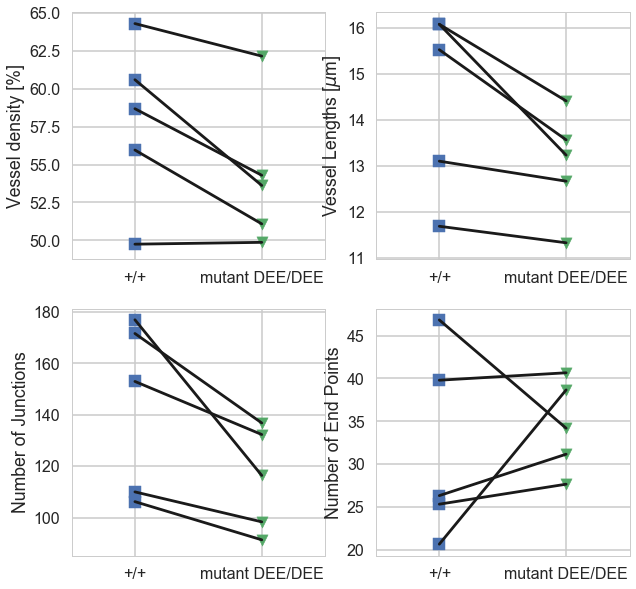

In [159]:
wild_data = [wildVPA, wildVesselsLength,
             wildNJunctions, wildNEndPoints]

mutant_data = [mutantVPA, mutantVesselsLength,
               mutantNJunctions, mutantNEndPoints]

ylabels = ['Vessel density [%]','Vessel Lengths [$\mu$m]',
          'Number of Junctions', 'Number of End Points']

fig, axes = plt.subplots(2,2, figsize=(10,10))
ax = axes.ravel()

data_zip = zip(wild_data, mutant_data)

for i, (w, m) in enumerate(data_zip):
    pair_dot_plot(w, m, ylabels[i], ax=ax[i])

In [160]:
pd.options.display.float_format = '{:,.2f}'.format

## Look at the difference in means
diff = wild - mutant
diff

,Vessels percentage area,Total Number of Junctions,Total Vessels Length,Total Number of End Points
Litter,,,,
35,6.97,20.67,1.96,-18.00
36,2.15,34.83,1.67,-4.83
37,4.39,11.67,0.44,-2.33
40,4.87,60.60,2.85,12.63
41,-0.12,14.87,0.36,-0.87


In [161]:
means = diff.mean()
means

Vessels percentage area       3.65
Total Number of Junctions    28.53
Total Vessels Length          1.46
Total Number of End Points   -2.68
dtype: float64

In [188]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.set_context("talk")

In [189]:
data_mean = data_mean.reset_index(0).reset_index()
#data_mean.index
#data_mean.head()

,level_0,index,Genotype,Litter,Vessels percentage area,Total Number of Junctions,Total Vessels Length,Total Number of End Points
0,0,0,+/+,35,60.59,153.00,15.53,20.67
1,1,1,DEE/DEE,35,53.62,132.33,13.57,38.67
2,2,2,+/+,36,64.30,171.67,16.09,26.33
3,3,3,DEE/DEE,36,62.15,136.83,14.42,31.17
4,4,4,+/+,37,58.68,110.00,13.10,25.33


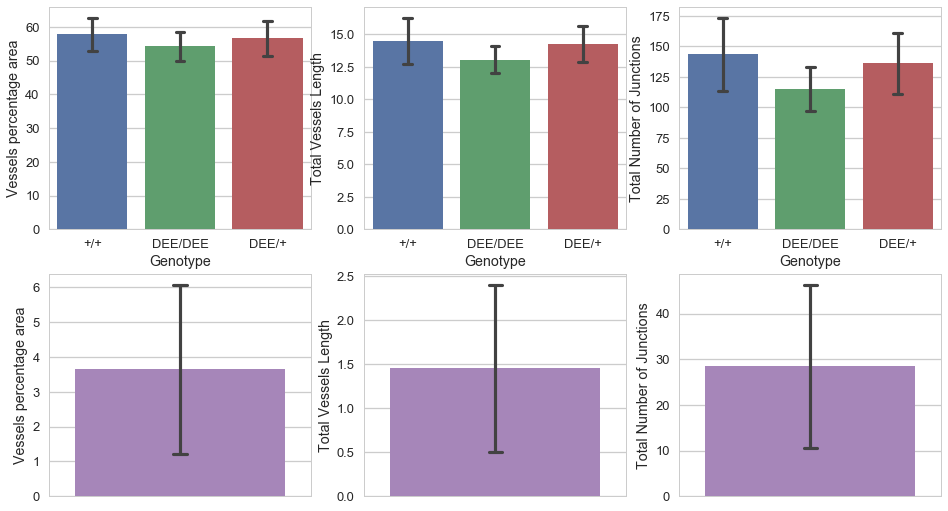

In [190]:
## This is what you would do for an independent t-test
## But we did a dependent t-test
## IMO this should not be shown since it is highly misleading

fig, axes = plt.subplots(nrows= 2, ncols=3, figsize = (16,9))
ax = axes.ravel()

parameters = ['Vessels percentage area', 'Total Vessels Length',
             'Total Number of Junctions']

with sns.plotting_context("notebook", font_scale=1.5):
    for i, parameter in enumerate(parameters): 
        g = sns.factorplot(x = 'Genotype',
                           y = parameter ,
                           #hue_order = ['+/+', 'DEE/DEE'],
                           ci = 'sd',
                           kind = 'bar',
                           capsize = .1,
                           data = data_mean,
                           ax = ax[i]
                          )
        
        _ = sns.barplot(diff[parameter],
                        ci = 'sd',
                        orient ='v',
                        capsize = .05,
                        ax = ax[i+3],
                        color = sns.xkcd_rgb["wisteria"],
                        #alpha=0.9
                       )
        ### factorplot creates its own figure
        ### But we can tell it to plot to a figure
        ### as created outside this loop.
        ### 
        ### If plt.close(g.fig) isn't called,
        ### there will be blank figures.
        plt.close(g.fig)


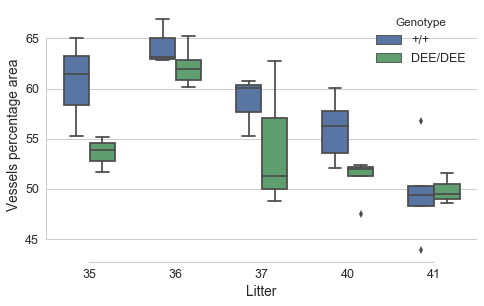

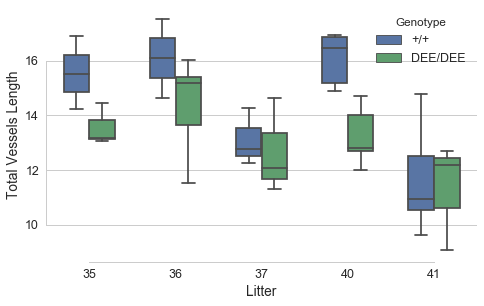

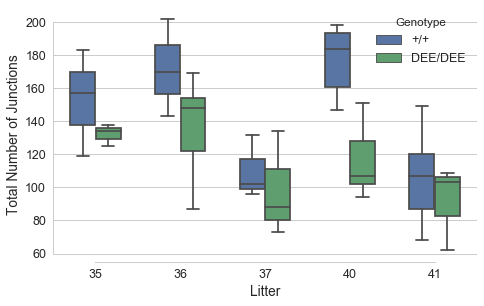

In [191]:
## Box plots of all 

def factorplot_by_litter_and_parameter(parameter_name):
    _ = sns.factorplot(x = "Litter",
                       y = parameter_name,
                       hue = 'Genotype',
                       hue_order = ['+/+', 'DEE/DEE'],
                       data = df,
                       kind ='box',
                       ci = 'sd',
                       size = 4.5,      # figsize
                       aspect = 1.55, # of figure
                       width = 0.6,   # of boxes
                       legend_out = False
                 )
    sns.despine(trim=True)
    


with sns.plotting_context("notebook", font_scale=1.25):
    for parameter in parameters:
        factorplot_by_litter_and_parameter(parameter)

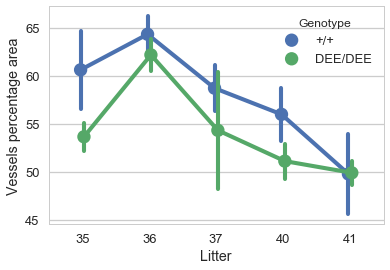

In [192]:
sns.pointplot(x = "Litter",
                       y = "Vessels percentage area",
                       hue = 'Genotype',
                       hue_order = ['+/+', 'DEE/DEE'],
                       data = df,
              dodge = True,
              ci = 'sd'
                       #kind ='box',
                       #size = 4.5,      # figsize
                       #aspect = 1.55, # of figure
                       #width = 0.6,   # of boxes
                       #legend_out = False
                 )

Text(0.5,1,'Difference between wild type and mutant')

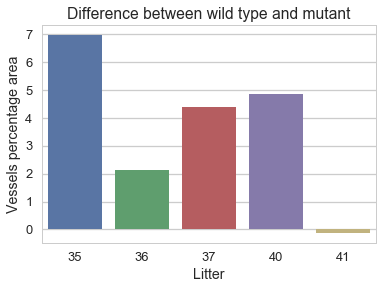

In [193]:
fig, ax = plt.subplots()

_ = sns.barplot(x = diff['Vessels percentage area'].index, 
                y = diff['Vessels percentage area']
               )

ax.set_title('Difference between wild type and mutant')

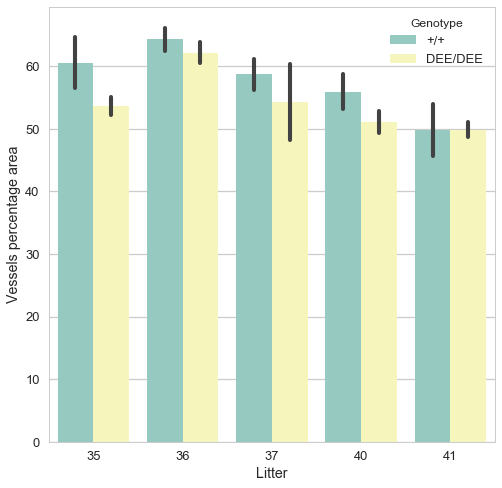

In [194]:
fig, ax = plt.subplots(figsize=(8,8))

### hue_order can be used to only use certain hues

_ = sns.barplot(x = "Litter",
                y = "Vessels percentage area",
                hue = 'Genotype',
                hue_order = ['+/+', 'DEE/DEE'],
                ci = 'sd',
                data = df,
                palette = "Set3"
               )

If we want to be more truthful about having multiple images per litter animal, then we should show this.

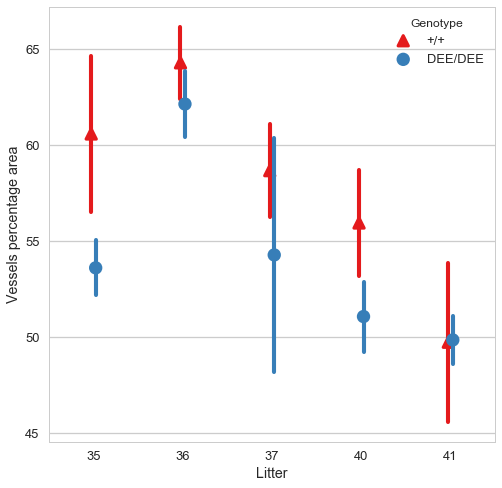

In [195]:
fig, ax = plt.subplots(figsize=(8,8))
sns.pointplot(x = "Litter",
              y = "Vessels percentage area",
              hue ='Genotype',
              hue_order = ['+/+', 'DEE/DEE'],
              ci = 'sd',
              data = df,
              markers = ["^", "o"],
              dodge = True,
              join = False,
              palette = "Set1"
             )

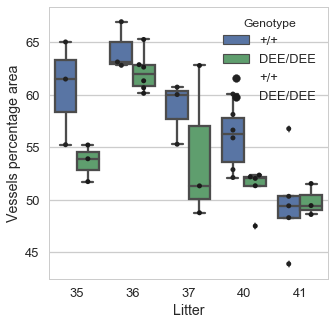

In [196]:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(x = "Litter",
            y = "Vessels percentage area",
            hue = 'Genotype',
            hue_order = ['+/+', 'DEE/DEE'],
            data = df,
              #linestyles=["-", "--"],
             #dodge=True
            #notch=True
            #width=0.25
             )

sns.swarmplot(x = "Litter",
              y = "Vessels percentage area",
              hue = 'Genotype',
              hue_order = ['+/+', 'DEE/DEE'],
              data = df,
              dodge = True,
              color = 'k'
             )

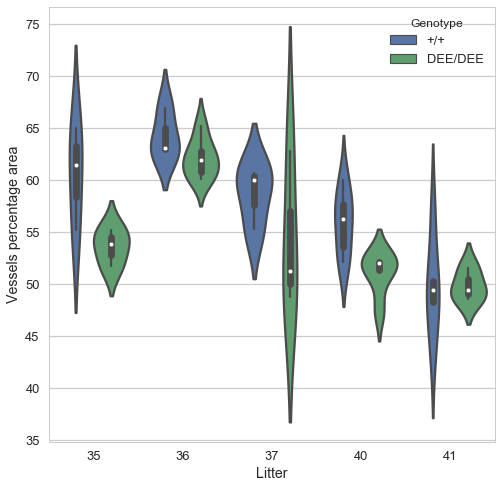

In [197]:
fig, ax = plt.subplots(figsize=(8,8))
sns.violinplot(x = "Litter", y="Vessels percentage area",
               hue ='Genotype',
               hue_order = ['+/+', 'DEE/DEE'],
               data=df,
              #linestyles=["-", "--"],
             #dodge=True
               #split=True,
               #inner='stick'
             )

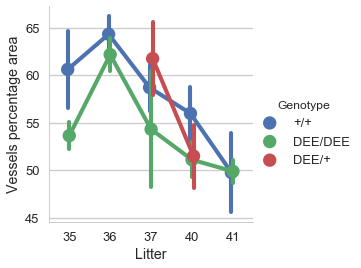

In [200]:
_ = sns.factorplot(x = "Litter",
                   y = "Vessels percentage area",
                   hue = 'Genotype',
                   #hue_order = ['+/+', 'DEE/DEE'],
                   data = df,
                   ci = 'sd',
                   dodge = True,
                   alpha=0.6
                  )

In [173]:
#sns.factorplot(x = "Litter", y="Vessels percentage area",
#               col = 'Genotype', data=df)

In [174]:
## This is a bad plot because a shared y-axis doesn't make sense
#pd.concat(
#    [diff.mean().rename('diff')],
#    axis=1
#).plot.bar()
#plt.show()

## Boxplots for different parameters

The following boxplots were created before the t-test was done. These boxplots can be ignored since seaborn does them so much better.

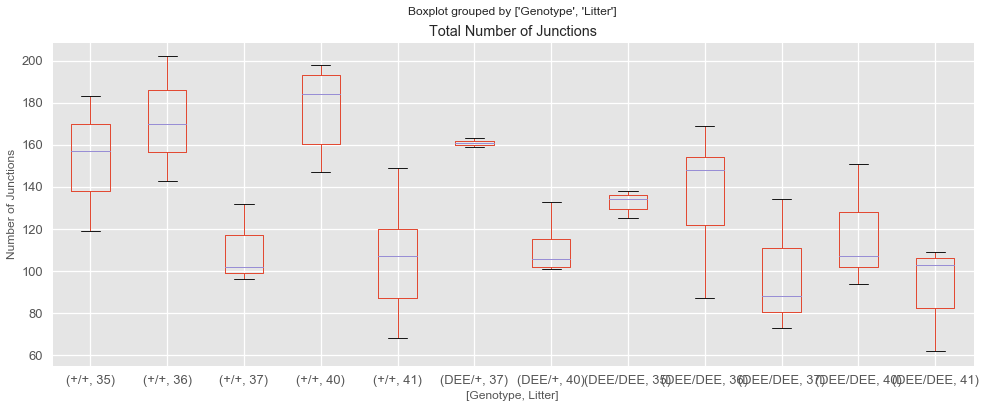

In [204]:

matplotlib.style.use('ggplot')

df.boxplot(column = ['Total Number of Junctions'],
                     #by = ['Litter', 'Genotype'],
                     by = ['Genotype', 'Litter'],
                     figsize = (16,6)
                    )
plt.ylabel('Number of Junctions')
plt.show()

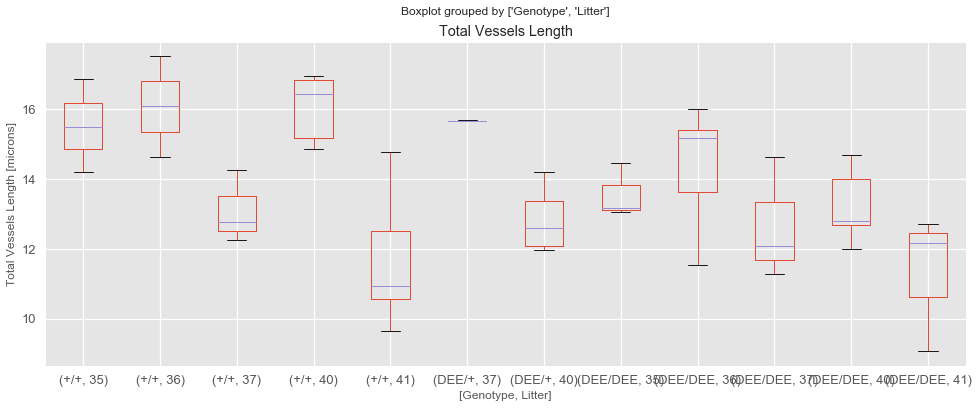

In [205]:
df.boxplot(column = ['Total Vessels Length'],
                     by = ['Genotype', 'Litter'],
                     figsize = (16,6)
                    )
plt.ylabel('Total Vessels Length [microns]')
plt.show()

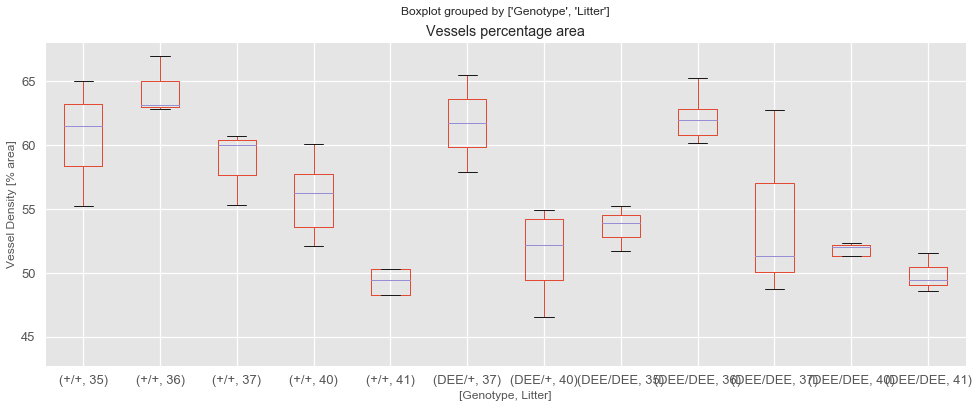

In [206]:
df.boxplot(column = ['Vessels percentage area'],
                     by = ['Genotype', 'Litter'],
                     figsize = (16,6)
                    )
plt.ylabel('Vessel Density [% area]')
plt.show()

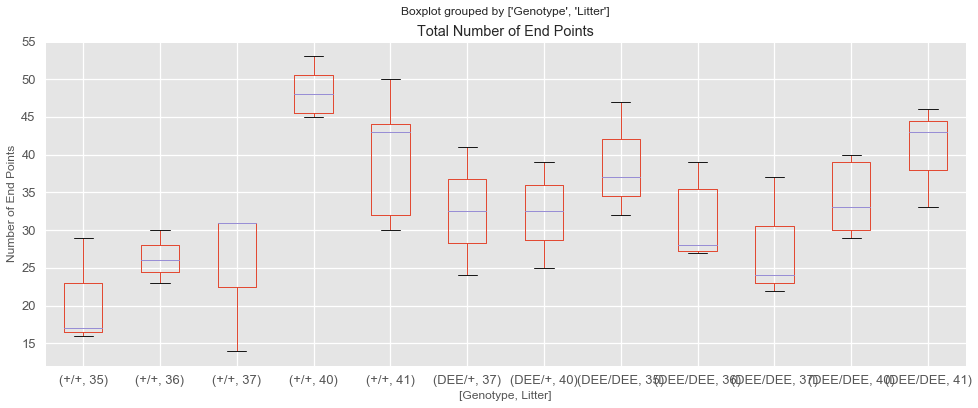

In [207]:
df.boxplot(column = ['Total Number of End Points'],
                     by = ['Genotype', 'Litter'],
                     figsize = (16,6)
                    )
plt.ylabel('Number of End Points')
plt.show()

## Comparison in Percentages

The below table represents mutant values normalized to wild type in percentage.

In [179]:
normdata = ((mutant / wild.values * 100)
            .rename(
                columns={
                    'Vessels percentage area':'norm Vessels Density',
                    'Total Number of Junctions':'norm Number of Junctions',
                    'Total Vessels Length':'norm Vessels Length',
                    'Total Number of End Points':'norm Number of End Points'}
                    )
            )

#normdata.drop('Genotype', axis=0, level=1, inplace=True)
#normdata.drop('Vessel Thickness', axis=0, level=1,inplace=True)
#normdata[['norm Vessels Density','norm Number of Junctions', 'norm Vessels Length', 'norm Number of End Points']]
pd.options.display.float_format = '{:,.2f}'.format
normdata



,norm Vessels Density,norm Number of Junctions,norm Vessels Length,norm Number of End Points
Litter,,,,
35,88.49,86.49,87.36,187.10
36,96.66,79.71,89.62,118.35
37,92.52,89.39,96.67,109.21
40,91.29,65.76,82.27,73.02
41,100.24,86.00,96.92,102.18


In [180]:
data_mean

,Genotype,Litter,Vessels percentage area,Total Number of Junctions,Total Vessels Length,Total Number of End Points
0,+/+,35,60.59,153.00,15.53,20.67
1,DEE/DEE,35,53.62,132.33,13.57,38.67
2,+/+,36,64.30,171.67,16.09,26.33
3,DEE/DEE,36,62.15,136.83,14.42,31.17
4,+/+,37,58.68,110.00,13.10,25.33
5,DEE/+,37,61.73,161.00,15.67,32.50
6,DEE/DEE,37,54.29,98.33,12.67,27.67
7,+/+,40,55.96,177.00,16.09,46.83
8,DEE/+,40,51.47,111.25,12.85,32.25
9,DEE/DEE,40,51.08,116.40,13.23,34.20


In [181]:
normdata.mean()

norm Vessels Density         93.84
norm Number of Junctions     81.47
norm Vessels Length          90.57
norm Number of End Points   117.97
dtype: float64

In [182]:
normdata.std()

norm Vessels Density         4.63
norm Number of Junctions     9.47
norm Vessels Length          6.28
norm Number of End Points   42.20
dtype: float64

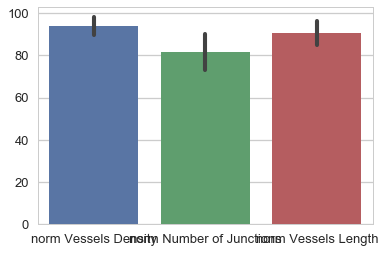

In [201]:
_ = sns.barplot(
    data = normdata[['norm Vessels Density',
                     'norm Number of Junctions',
                     'norm Vessels Length']],
    ci = 'sd'
)

## Mean and std for different variables in different litters

If you want to look at the numbers after averaging, here they are.

In [184]:
(df.groupby(['Litter', 'Genotype'])
                     ['Total Number of End Points']
                     .describe()
)

count  mean   std   min   25%   50%   75%   max
Litter Genotype                                                 
35     +/+        3.00 20.67  7.23 16.00 16.50 17.00 23.00 29.00
       DEE/DEE    3.00 38.67  7.64 32.00 34.50 37.00 42.00 47.00
36     +/+        3.00 26.33  3.51 23.00 24.50 26.00 28.00 30.00
       DEE/DEE    6.00 31.17  5.71 27.00 27.25 28.00 35.50 39.00
37     +/+        3.00 25.33  9.81 14.00 22.50 31.00 31.00 31.00
       DEE/+      2.00 32.50 12.02 24.00 28.25 32.50 36.75 41.00
       DEE/DEE    3.00 27.67  8.14 22.00 23.00 24.00 30.50 37.00
40     +/+        6.00 46.83  6.01 36.00 45.50 48.00 50.50 53.00
       DEE/+      4.00 32.25  6.08 25.00 28.75 32.50 36.00 39.00
       DEE/DEE    5.00 34.20  5.07 29.00 30.00 33.00 39.00 40.00
41     +/+        5.00 39.80  8.50 30.00 32.00 43.00 44.00 50.00
       DEE/DEE    3.00 40.67  6.81 33.00 38.00 43.00 44.50 46.00

In [185]:
(df.groupby(['Litter', 'Genotype'])
                     ['Vessels percentage area']
                     .describe()
)

count  mean  std   min   25%   50%   75%   max
Litter Genotype                                                
35     +/+        3.00 60.59 4.96 55.25 58.37 61.50 63.27 65.03
       DEE/DEE    3.00 53.62 1.76 51.73 52.82 53.91 54.56 55.22
36     +/+        3.00 64.30 2.31 62.81 62.97 63.13 65.04 66.96
       DEE/DEE    6.00 62.15 1.86 60.14 60.84 61.98 62.81 65.27
37     +/+        3.00 58.68 2.96 55.29 57.66 60.02 60.38 60.73
       DEE/+      2.00 61.73 5.38 57.92 59.83 61.73 63.63 65.54
       DEE/DEE    3.00 54.29 7.47 48.76 50.04 51.32 57.06 62.79
40     +/+        6.00 55.96 3.04 52.12 53.63 56.27 57.76 60.07
       DEE/+      4.00 51.47 3.82 46.53 49.46 52.22 54.23 54.94
       DEE/DEE    5.00 51.08 2.04 47.50 51.34 52.04 52.19 52.35
41     +/+        5.00 49.74 4.64 43.90 48.30 49.42 50.33 56.77
       DEE/DEE    3.00 49.87 1.52 48.60 49.02 49.45 50.50 51.55

In [186]:
(df.groupby(['Litter', 'Genotype'])
                     ['Total Number of Junctions']
                     .describe()
)

count   mean   std    min    25%    50%    75%    max
Litter Genotype                                                       
35     +/+        3.00 153.00 32.19 119.00 138.00 157.00 170.00 183.00
       DEE/DEE    3.00 132.33  6.66 125.00 129.50 134.00 136.00 138.00
36     +/+        3.00 171.67 29.54 143.00 156.50 170.00 186.00 202.00
       DEE/DEE    6.00 136.83 30.67  87.00 121.75 148.00 154.00 169.00
37     +/+        3.00 110.00 19.29  96.00  99.00 102.00 117.00 132.00
       DEE/+      2.00 161.00  2.83 159.00 160.00 161.00 162.00 163.00
       DEE/DEE    3.00  98.33 31.79  73.00  80.50  88.00 111.00 134.00
40     +/+        6.00 177.00 21.49 147.00 160.50 184.00 193.25 198.00
       DEE/+      4.00 111.25 14.93 101.00 101.75 105.50 115.00 133.00
       DEE/DEE    5.00 116.40 23.07  94.00 102.00 107.00 128.00 151.00
41     +/+        5.00 106.20 31.03  68.00  87.00 107.00 120.00 149.00
       DEE/DEE    3.00  91.33 25.58  62.00  82.50 103.00 106.00 109.00

In [187]:
(df.groupby(['Litter', 'Genotype'])
                     ['Total Vessels Length']
                     .describe()
)

count  mean  std   min   25%   50%   75%   max
Litter Genotype                                                
35     +/+        3.00 15.53 1.33 14.21 14.86 15.50 16.19 16.88
       DEE/DEE    3.00 13.57 0.78 13.05 13.12 13.18 13.82 14.47
36     +/+        3.00 16.09 1.44 14.64 15.37 16.09 16.81 17.52
       DEE/DEE    6.00 14.42 1.71 11.54 13.64 15.17 15.40 16.01
37     +/+        3.00 13.10 1.05 12.26 12.52 12.77 13.52 14.28
       DEE/+      2.00 15.67 0.02 15.66 15.67 15.67 15.68 15.69
       DEE/DEE    3.00 12.67 1.74 11.29 11.69 12.08 13.35 14.62
40     +/+        6.00 16.09 0.98 14.88 15.20 16.46 16.86 16.95
       DEE/+      4.00 12.85 1.03 11.96 12.10 12.61 13.36 14.21
       DEE/DEE    5.00 13.23 1.09 11.99 12.70 12.79 14.01 14.69
41     +/+        5.00 11.68 2.02  9.64 10.55 10.94 12.50 14.79
       DEE/DEE    3.00 11.32 1.96  9.08 10.63 12.18 12.45 12.71